In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


In [3]:
df=pd.read_csv("NSE_Tata_Global.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


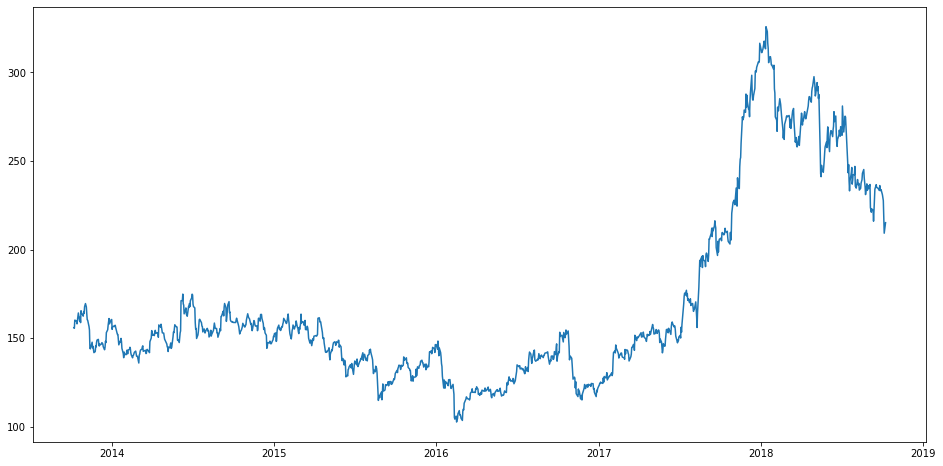

In [4]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [5]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

In [8]:
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

In [9]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
new_dataset.head()

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45


In [25]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)
scaled_data[:5]

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       [0.25728373],
       [0.25459435]])

In [11]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [12]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 13s - loss: 9.8476e-04


In [13]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [14]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [15]:
predicted_closing_price=lstm_model.predict(X_test)

In [16]:
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [17]:
lstm_model.save("saved_model.h5")

<ipython-input-18-397e778e3e61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


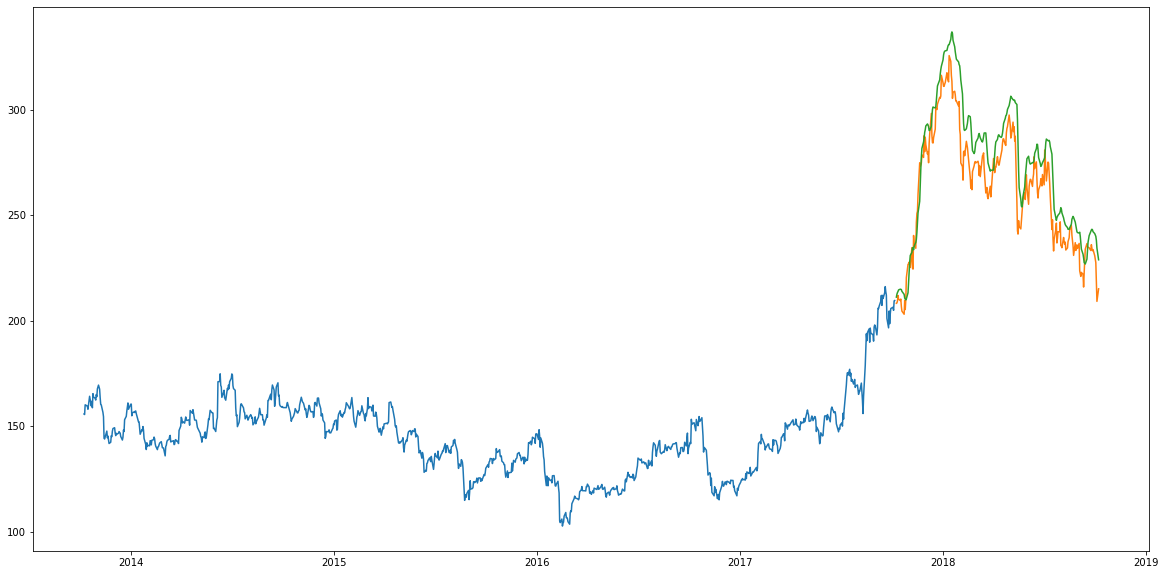

In [18]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [19]:
predicted_closing_price

array([[211.22057],
       [212.57541],
       [213.39331],
       [213.91713],
       [214.63654],
       [214.97856],
       [214.92741],
       [214.78886],
       [213.96793],
       [212.53218],
       [210.75269],
       [210.31482],
       [209.87372],
       [210.3822 ],
       [213.29146],
       [218.17328],
       [223.31978],
       [227.86183],
       [230.9435 ],
       [232.43005],
       [234.55647],
       [234.68887],
       [233.67262],
       [235.30411],
       [237.17522],
       [238.57411],
       [241.91827],
       [246.50967],
       [251.17516],
       [256.64432],
       [264.55765],
       [271.88788],
       [277.71802],
       [281.7524 ],
       [284.83725],
       [286.53006],
       [289.34818],
       [290.60492],
       [292.3717 ],
       [293.33887],
       [292.86874],
       [292.04327],
       [290.22507],
       [290.26843],
       [292.25638],
       [297.06738],
       [300.24106],
       [301.3711 ],
       [301.21075],
       [300.9455 ],


In [20]:
inputs_data

array([[0.31869117],
       [0.32608696],
       [0.3207082 ],
       [0.33325863],
       [0.31869117],
       [0.32496638],
       [0.30770955],
       [0.31174361],
       [0.30188256],
       [0.3070372 ],
       [0.31174361],
       [0.29471089],
       [0.29807261],
       [0.29986553],
       [0.29067683],
       [0.27991932],
       [0.28686688],
       [0.28597042],
       [0.3038996 ],
       [0.28395338],
       [0.26647243],
       [0.23913043],
       [0.27588525],
       [0.34110264],
       [0.4087853 ],
       [0.39421784],
       [0.41125056],
       [0.41909458],
       [0.39085612],
       [0.42088749],
       [0.41057822],
       [0.40632004],
       [0.39309727],
       [0.42312864],
       [0.42738682],
       [0.4255939 ],
       [0.40632004],
       [0.42155984],
       [0.46302107],
       [0.46212461],
       [0.46727925],
       [0.47781264],
       [0.49036307],
       [0.46907216],
       [0.49036307],
       [0.48363962],
       [0.49596593],
       [0.508

In [21]:
rms=np.sqrt(np.mean(np.power((np.array(y_train_data)-np.array(predicted_closing_price)),2)))

In [22]:
rms

275.181189146088

In [26]:
X_test[:5]

array([[[0.31869117],
        [0.32608696],
        [0.3207082 ],
        [0.33325863],
        [0.31869117],
        [0.32496638],
        [0.30770955],
        [0.31174361],
        [0.30188256],
        [0.3070372 ],
        [0.31174361],
        [0.29471089],
        [0.29807261],
        [0.29986553],
        [0.29067683],
        [0.27991932],
        [0.28686688],
        [0.28597042],
        [0.3038996 ],
        [0.28395338],
        [0.26647243],
        [0.23913043],
        [0.27588525],
        [0.34110264],
        [0.4087853 ],
        [0.39421784],
        [0.41125056],
        [0.41909458],
        [0.39085612],
        [0.42088749],
        [0.41057822],
        [0.40632004],
        [0.39309727],
        [0.42312864],
        [0.42738682],
        [0.4255939 ],
        [0.40632004],
        [0.42155984],
        [0.46302107],
        [0.46212461],
        [0.46727925],
        [0.47781264],
        [0.49036307],
        [0.46907216],
        [0.49036307],
        [0